In [1]:
# In this notebook I have used fancyimpute technique to impute missing values in the entire WiDS2020 dataset. 
# I have used LGBM to train the model. I got accuracy of 0.88. Parameter tuning might help in bettring this score.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./input\samplesubmission.csv
./input\solution_template.csv
./input\training_v2.csv
./input\unlabeled.csv
./input\WiDS Datathon 2020 Dictionary.csv


In [4]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

ModuleNotFoundError: No module named 'fancyimpute'

In [4]:
#read the data and drop noisy columns
train=pd.read_csv("/kaggle/input/widsdatathon2020/training_v2.csv")
test=pd.read_csv("/kaggle/input/widsdatathon2020/unlabeled.csv")
solution = pd.read_csv("/kaggle/input/solutiontemplate/solution_template.csv")
trainv1=train.drop(['encounter_id','patient_id','icu_id', 'hospital_id', 'readmission_status','ethnicity'],axis=1)
testv1=test.drop(['encounter_id','patient_id','icu_id', 'hospital_id', 'readmission_status','hospital_death','ethnicity'],axis=1)
print("number of rows and columns in training set is \n",trainv1.shape)
print("number of rows and columns in test set is \n",testv1.shape)

number of rows and columns in training set is 
 (91713, 180)
number of rows and columns in test set is 
 (39308, 179)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 180 entries, hospital_death to apache_2_bodysystem
dtypes: float64(170), int64(3), object(7)
memory usage: 125.9+ MB


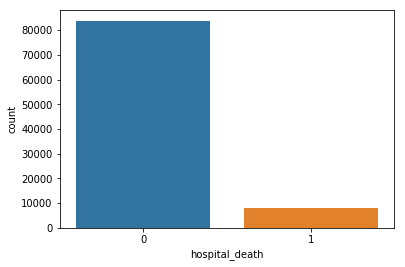

In [5]:
#Exploring the data
trainv1.info()
trainv1.describe()
trainv1.isna().sum()
testv1.isna().sum()
trainv1['hospital_death'].value_counts()*100/len(trainv1['hospital_death'])
sns.countplot(trainv1['hospital_death'])

In [6]:
#Seperate categorical and numerical variables
cattrain=trainv1.select_dtypes('object')
numtrain=trainv1.select_dtypes('number')
cattest=testv1.select_dtypes('object')
numtest=testv1.select_dtypes('number')

In [7]:
#encoding categorical test variables
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = cattest.columns

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(cattest[columns])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be s

In [8]:
#encoding categorical train variables
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = cattrain.columns

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(cattrain[columns])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be s

In [9]:
#splitting train values into sections for faster imputing
numtrain1=numtrain[0:20000]
numtrain2=numtrain[20000:40000]
numtrain3=numtrain[40000:60000]
numtrain4=numtrain[60000:80000]
numtrain5=numtrain[80000:]

cattrain1=cattrain[0:20000]
cattrain2=cattrain[20000:40000]
cattrain3=cattrain[40000:60000]
cattrain4=cattrain[60000:80000]
cattrain5=cattrain[80000:]

In [10]:
#splitting test values into sections for faster imputing
cattest1=cattest[0:20000]
cattest2=cattest[20000:]

numtest1=numtest[0:20000]
numtest2=numtest[20000:]

In [11]:
# impute catgorical test data and convert                                                                                                                                                   
encode_testdata1 = pd.DataFrame(np.round(imputer.fit_transform(cattest1)),columns = cattest.columns)
encode_testdata2 = pd.DataFrame(np.round(imputer.fit_transform(cattest2)),columns = cattest.columns)


Imputing row 1/20000 with 0 missing, elapsed time: 65.299
Imputing row 101/20000 with 0 missing, elapsed time: 65.306
Imputing row 201/20000 with 1 missing, elapsed time: 65.313
Imputing row 301/20000 with 1 missing, elapsed time: 65.320
Imputing row 401/20000 with 1 missing, elapsed time: 65.325
Imputing row 501/20000 with 0 missing, elapsed time: 65.333
Imputing row 601/20000 with 2 missing, elapsed time: 65.340
Imputing row 701/20000 with 0 missing, elapsed time: 65.347
Imputing row 801/20000 with 0 missing, elapsed time: 65.356
Imputing row 901/20000 with 0 missing, elapsed time: 65.362
Imputing row 1001/20000 with 0 missing, elapsed time: 65.369
Imputing row 1101/20000 with 0 missing, elapsed time: 65.376
Imputing row 1201/20000 with 0 missing, elapsed time: 65.386
Imputing row 1301/20000 with 0 missing, elapsed time: 65.394
Imputing row 1401/20000 with 1 missing, elapsed time: 65.403
Imputing row 1501/20000 with 0 missing, elapsed time: 65.411
Imputing row 1601/20000 with 1 missi

In [12]:
# impute catgorical train data and convert                                                                                                                                                   
encode_data1 = pd.DataFrame(np.round(imputer.fit_transform(cattrain1)),columns = cattrain.columns)
encode_data2 = pd.DataFrame(np.round(imputer.fit_transform(cattrain2)),columns = cattrain.columns)
encode_data3 = pd.DataFrame(np.round(imputer.fit_transform(cattrain3)),columns = cattrain.columns)
encode_data4 = pd.DataFrame(np.round(imputer.fit_transform(cattrain4)),columns = cattrain.columns)
encode_data5 = pd.DataFrame(np.round(imputer.fit_transform(cattrain5)),columns = cattrain.columns)

Imputing row 1/20000 with 0 missing, elapsed time: 58.648
Imputing row 101/20000 with 0 missing, elapsed time: 58.651
Imputing row 201/20000 with 0 missing, elapsed time: 58.654
Imputing row 301/20000 with 0 missing, elapsed time: 58.656
Imputing row 401/20000 with 0 missing, elapsed time: 58.659
Imputing row 501/20000 with 0 missing, elapsed time: 58.662
Imputing row 601/20000 with 0 missing, elapsed time: 58.665
Imputing row 701/20000 with 0 missing, elapsed time: 58.667
Imputing row 801/20000 with 0 missing, elapsed time: 58.670
Imputing row 901/20000 with 0 missing, elapsed time: 58.673
Imputing row 1001/20000 with 0 missing, elapsed time: 58.677
Imputing row 1101/20000 with 0 missing, elapsed time: 58.679
Imputing row 1201/20000 with 1 missing, elapsed time: 58.682
Imputing row 1301/20000 with 0 missing, elapsed time: 58.684
Imputing row 1401/20000 with 0 missing, elapsed time: 58.687
Imputing row 1501/20000 with 0 missing, elapsed time: 58.691
Imputing row 1601/20000 with 0 missi

In [13]:
cattrainfill=pd.concat([encode_data1,encode_data2,encode_data3,encode_data4,encode_data5])
cattestfill=pd.concat([encode_testdata1,encode_testdata2])

In [14]:
#impute numerical test data
encode_testdatanum = pd.DataFrame(np.round(imputer.fit_transform(numtest1)),columns = numtest.columns)
encode_testdatanum2 = pd.DataFrame(np.round(imputer.fit_transform(numtest2)),columns = numtest.columns)


Imputing row 1/20000 with 70 missing, elapsed time: 598.872
Imputing row 101/20000 with 65 missing, elapsed time: 599.924
Imputing row 201/20000 with 73 missing, elapsed time: 600.979
Imputing row 301/20000 with 61 missing, elapsed time: 602.048
Imputing row 401/20000 with 22 missing, elapsed time: 603.136
Imputing row 501/20000 with 55 missing, elapsed time: 604.142
Imputing row 601/20000 with 69 missing, elapsed time: 605.172
Imputing row 701/20000 with 0 missing, elapsed time: 606.162
Imputing row 801/20000 with 23 missing, elapsed time: 607.135
Imputing row 901/20000 with 45 missing, elapsed time: 608.223
Imputing row 1001/20000 with 51 missing, elapsed time: 609.239
Imputing row 1101/20000 with 35 missing, elapsed time: 610.281
Imputing row 1201/20000 with 6 missing, elapsed time: 611.379
Imputing row 1301/20000 with 68 missing, elapsed time: 612.428
Imputing row 1401/20000 with 35 missing, elapsed time: 613.471
Imputing row 1501/20000 with 54 missing, elapsed time: 614.448
Imputi

In [15]:
#impute numerical train data
encode_datanum1 = pd.DataFrame(np.round(imputer.fit_transform(numtrain1)),columns = numtrain.columns)
encode_datanum2 = pd.DataFrame(np.round(imputer.fit_transform(numtrain2)),columns = numtrain.columns)
encode_datanum3 = pd.DataFrame(np.round(imputer.fit_transform(numtrain3)),columns = numtrain.columns)
encode_datanum4 = pd.DataFrame(np.round(imputer.fit_transform(numtrain4)),columns = numtrain.columns)
encode_datanum5 = pd.DataFrame(np.round(imputer.fit_transform(numtrain5)),columns = numtrain.columns)

Imputing row 1/20000 with 60 missing, elapsed time: 566.274
Imputing row 101/20000 with 72 missing, elapsed time: 567.340
Imputing row 201/20000 with 56 missing, elapsed time: 568.365
Imputing row 301/20000 with 49 missing, elapsed time: 569.523
Imputing row 401/20000 with 78 missing, elapsed time: 570.545
Imputing row 501/20000 with 72 missing, elapsed time: 571.530
Imputing row 601/20000 with 100 missing, elapsed time: 572.548
Imputing row 701/20000 with 66 missing, elapsed time: 573.542
Imputing row 801/20000 with 15 missing, elapsed time: 574.543
Imputing row 901/20000 with 75 missing, elapsed time: 575.624
Imputing row 1001/20000 with 43 missing, elapsed time: 576.724
Imputing row 1101/20000 with 52 missing, elapsed time: 577.744
Imputing row 1201/20000 with 67 missing, elapsed time: 578.774
Imputing row 1301/20000 with 66 missing, elapsed time: 579.827
Imputing row 1401/20000 with 68 missing, elapsed time: 580.868
Imputing row 1501/20000 with 68 missing, elapsed time: 581.945
Imp

In [16]:
numtrainfill=pd.concat([encode_datanum1,encode_datanum2,encode_datanum3,encode_datanum4,encode_datanum5])
numtestfill=pd.concat([encode_testdatanum,encode_testdatanum2])

In [17]:
trainv6=pd.concat([numtrainfill,cattrainfill],axis=1,join='inner')
testv6=pd.concat([numtestfill,cattestfill],axis=1,join='inner')

In [18]:
y=trainv6['hospital_death']
trainv7=trainv6.drop(['hospital_death'], axis=1)

In [19]:
# Split into training and validation set
x_train, x_val, y_train, y_val = train_test_split(trainv7, y, test_size = 0.25, random_state = 1)

In [20]:
#Model building
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [21]:
#Prediction
y_pred=clf.predict(x_val)
y_pred1=np.round(y_pred)

In [22]:
#Measure accuracy
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred1)
print (cm)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred1,y_val)
print (accuracy)

[[20922     0]
 [ 2007     0]]
0.9124689258144708


In [23]:
#Prediction on Test variables
pred_on_test=clf.predict(testv6)

In [24]:
solution.hospital_death = pred_on_test
solution.to_csv("submissionlgbm.csv", index=0)